In [5]:
# preprocessing
# import the necessary libraries
import string
import nltk
import re
def text_lowercase(text):
    return text.lower()
# Remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
# remove stopwords
def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])
# stemming
def stem_text(text):
    ps = nltk.PorterStemmer()
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([ps.stem(token) for token in tokens])
# lemmatization
def lemmatize_text(text):
    wnl = nltk.WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([wnl.lemmatize(token) for token in tokens])
# remove special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
# remove extra newlines
def remove_extra_newlines(text):
    pattern=r'[\r|\n|\r]+'
    text=re.sub(pattern,' ',text)
    return text

# apply all the functions to the text
def preprocess(corpus):
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        doc = text_lowercase(doc)
        doc = remove_numbers(doc)
        doc = remove_punctuation(doc)
        doc = remove_whitespace(doc)
        doc = remove_special_characters(doc)
        doc = remove_extra_newlines(doc)
        doc = lemmatize_text(doc)
        doc = stem_text(doc)
        doc = remove_stopwords(doc)
        normalized_corpus.append(doc)
    return normalized_corpus

In [6]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Part A:

In [7]:
title=[
    "Automotive",
    "Car",
    "motorcycles",
    "self-drive",
    "hire",
    "Dhoni",
    "World cup",
    "Safe driverless",
    "Skipper"
]
detail=[
    "Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.",
    "Automotive major Mahindra likely to introduce driverless cars",
    "BMW plans to introduce its own motorcycles in India",
    "Just drive, a self-drive car rental firm uses smart vehicle technology based on IoT",
    "Automotive industry going to hire thousands in 2018",
    "Famous cricket player  Dhoni brought his priced car Hummer which is an SUV",
    "Dhoni led india to its second world cup victory",
    "IoT in cars will lead to more safety and make driverless vehicle revolution possible",
    "Sachin recommended Dhoni for the indian skipper post"
]

In [8]:
detail=preprocess(detail)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(detail)

In [10]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

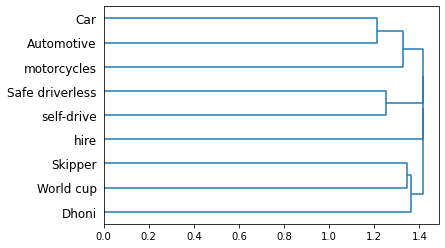

In [11]:
temp = hierarchy.linkage(X.todense(), 'complete', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)

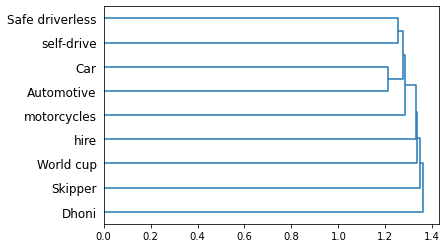

In [12]:
temp = hierarchy.linkage(X.todense(), 'single', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)

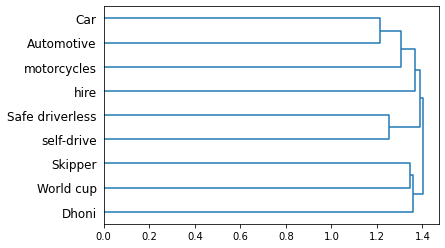

In [13]:
temp = hierarchy.linkage(X.todense(), 'average', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)

# Part B:

In [15]:
title=[
  "Tesla",
  "Electric",
  "Car/Vehicle/Automobile",
  "pollution",
  "de-monetization",
  "GST",
  "black money" 
]
link=[
    "https://en.wikipedia.org/wiki/Tesla,_Inc.",
    "https://www.merriam-webster.com/dictionary/electric",
    "https://en.wikipedia.org/wiki/Motor_vehicle",
    "https://en.wikipedia.org/wiki/Pollution",
    "https://www.investopedia.com/terms/d/demonetization.asp",
    "https://en.wikipedia.org/wiki/Goods_and_Services_Tax_(India)",
    "https://en.wikipedia.org/wiki/Indian_black_money"
]
detail=[]


In [16]:
import requests
from bs4 import BeautifulSoup

for url in link:
  print(url)
  r = requests.get(url)
  soup = BeautifulSoup(r.content, 'html.parser')
  lines = soup.find_all('p')
  s=""
  for line in lines:
      s=s+" "+line.text
  detail.append(s[0:min(len(s),250)])

https://en.wikipedia.org/wiki/Tesla,_Inc.
https://www.merriam-webster.com/dictionary/electric
https://en.wikipedia.org/wiki/Motor_vehicle
https://en.wikipedia.org/wiki/Pollution
https://www.investopedia.com/terms/d/demonetization.asp
https://en.wikipedia.org/wiki/Goods_and_Services_Tax_(India)
https://en.wikipedia.org/wiki/Indian_black_money


In [18]:
detail=preprocess(detail)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(detail)

In [21]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

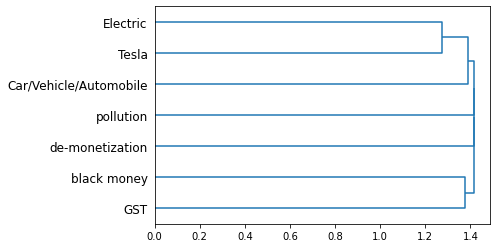

In [22]:
temp = hierarchy.linkage(X.todense(), 'complete', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)

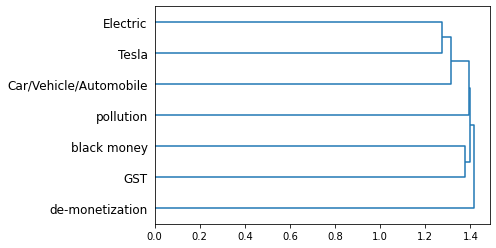

In [23]:
temp = hierarchy.linkage(X.todense(), 'single', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)

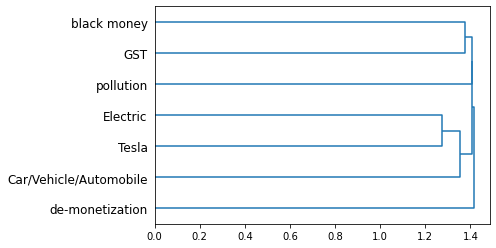

In [24]:
temp = hierarchy.linkage(X.todense(), 'average', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(temp, orientation='right', labels=title)